In [1]:
import turtle

# Define the coordinates for the star points
def draw_star():
    points = [
        (0, 100),   # Top point
        (-20, 20),  # Top-left inner point
        (-100, 0),  # Left point
        (-20, -20), # Bottom-left inner point
        (0, -100),  # Bottom point
        (20, -20),  # Bottom-right inner point
        (100, 0),   # Right point
        (20, 20),   # Top-right inner point
        (0, 100)    # Back to top point to close the shape
    ]

    turtle.speed(1)  
    turtle.penup()   # Don't draw when moving to the starting point
    turtle.goto(points[0])  
    turtle.pendown()  

    for point in points:
        turtle.goto(point)

    # Hide the turtle and display the window
    turtle.hideturtle()
    turtle.done()

# Draw the star
draw_star()

4 Point Star Using Matplotlib.plt

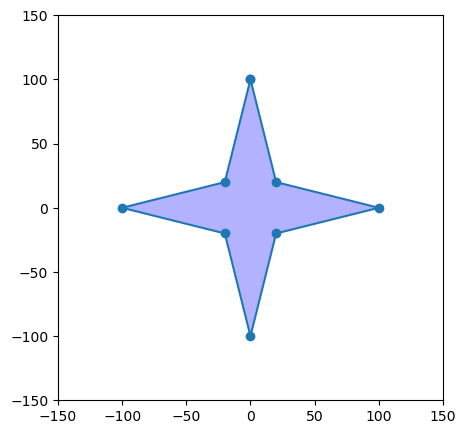

In [2]:
import matplotlib.pyplot as plt

points = [
    (0, 100),   # Top point
    (-20, 20),  # Top-left inner point
    (-100, 0),  # Left point
    (-20, -20), # Bottom-left inner point
    (0, -100),  # Bottom point
    (20, -20),  # Bottom-right inner point
    (100, 0),   # Right point
    (20, 20),   # Top-right inner point
    (0, 100)    # Back to top point to close the shape
]

# Unpack the points into x and y coordinates
x, y = zip(*points)

# Plot the star
plt.figure(figsize=(5,5))
plt.plot(x, y, marker='o')
plt.fill(x, y, 'b', alpha=0.3)  # Optional: Fill the star with a blue color (alpha controls transparency)
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.gca().set_aspect('equal', adjustable='box')  # Keep the aspect ratio square
plt.show()

4 Point Star manually

In [3]:
# Initialize the grid size
grid_size = 21
# Create a 2D grid filled with spaces
grid = [[' ' for _ in range(grid_size)] for _ in range(grid_size)]

# Manually determined points for a simplified star, centered around the middle of the grid
points = [(10, 0), (7, 7), (0, 10), (7, 13), (10, 20), (13, 13), (20, 10), (13, 7), (10, 0)]

# Function to draw a straight line between two points
def draw_line(grid, point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))
    
    x_inc = dx / steps
    y_inc = dy / steps
    
    x, y = x1, y1
    for _ in range(steps + 1):
        grid[int(round(y))][int(round(x))] = '*'
        x += x_inc
        y += y_inc

# Connect the points with lines
for i in range(len(points) - 1):
    draw_line(grid, points[i], points[i + 1])

# Print the grid to visualize the star
for row in grid:
    print(''.join(row))

          *          
          *          
         * *         
         * *         
        *   *        
        *   *        
       *     *       
      **     **      
    **         **    
  **             **  
**                 **
  **             **  
    **         **    
      **     **      
       *     *       
        *   *        
        *   *        
         * *         
         * *         
          *          
          *          


Pentagram Using Turtle

In [3]:
import turtle

# Set up the turtle environment
turtle.speed(1)  # Set drawing speed
turtle.penup()  # Lift the pen to move it to the starting position
turtle.goto(-90, -30)  # Move the turtle to the starting position
turtle.pendown()  # Put the pen down to start drawing

# Draw a pentagram
for _ in range(5):
    turtle.forward(200)  # Draw a line 200 units long
    turtle.right(144)  # Turn the turtle right by 144 degrees

turtle.done()  # Finish drawing and display the result

: 

Pentagram Using Matplotlib.plt

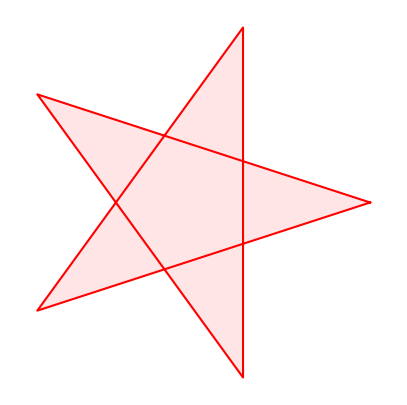

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw a pentagram
def draw_pentagram(size):
    # Define the points of a pentagram
    indices = np.array([0, 2, 4, 1, 3, 0])
    theta = np.linspace(0, 2 * np.pi, 6)
    x = size * np.cos(theta)
    y = size * np.sin(theta)

    # Plot the pentagram
    plt.figure(figsize=(5,5))
    plt.plot(x[indices], y[indices], 'r-')
    plt.fill(x[indices], y[indices], 'r', alpha=0.1)
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# Draw a pentagram with a size of 100 units
draw_pentagram(100)

Pentagram Manually

In [36]:
# get radius
r = int(input())

# define size of the print area (matrix)
size = 2 * r + 2

# initialize the print area with spaces
db = []
for i in range(size):
    db.append([])
    for j in range(size):
        db[i].append(' ')

# define center points
a = size / 2
b = size / 2

# define symbol
s = '*'

# coordinates of the vertices of 5-point star
# rounded to 2 decimal points to avoid floating point errors
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

def cos(x):
    result = 0
    for n in range(80):  # Increase for more accuracy
        result += ((-1)**n) * (x**(2*n)) / factorial(2*n)
    return result

def sin(x):
    result = 0
    for n in range(80):  # Increase for more accuracy
        result += ((-1)**n) * (x**(2*n + 1)) / factorial(2*n + 1)
    return result

PI = 3.141592653589793
star_x = []
star_y = []

for k in range(5):
    star_x.append(round(r*cos(2*PI*k/5 + PI) + a, 2))
    star_y.append(round(r*sin(2*PI*k/5 + PI) + b, 2))

# define error limits
L1 = 0.5
L2 = 1

# for each (x, y) coordinate, check whether it lies on the one of 5 straight lines of the star
for x in range(size):
    for y in range(size):
        for k in range(5):
            # equation of each straight line is generated using 2 points (x1, y1) and (x2, y2)
            x1, x2 = star_x[k], star_x[k+2 if k+2 < 5 else k-3]
            y1, y2 = star_y[k], star_y[k+2 if k+2 < 5 else k-3]
            try:
                if abs((y-y1)-((y2-y1)/(x2-x1))*(x-x1)) < L1 and ((x-a)**2 + (y-b)**2 - r**2 < L2):
                    db[x][y] = s
            except:
                if abs(x-x1) < L1 and ((x-a)**2 + (y-b)**2 - r**2 < L2):
                    db[x][y] = s    

# printing...
for i in range(size):
    for j in range(size):
        print(db[i][j], end=" ")
    print()

                                                                                    
                                          *                                         
                                          *                                         
                                        *   *                                       
                                        *   *                                       
                                        *   *                                       
                                      *       *                                     
                                      *       *                                     
                                      *       *                                     
                                    *           *                                   
                                    *           *                                   
                                    *           *                

In [ ]:
# get radius
r = int(input())

# define size of the print area (matrix)
size = 2 * r + 2

# initialize the print area with spaces
db = []
for i in range(size):
    db.append([])
    for j in range(size):
        db[i].append(' ')

# define center points
a = size / 2
b = size / 2

# define symbol
s = '*'

# coordinates of the vertices of 5-point star
# rounded to 2 decimal points to avoid floating point errors
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

def cos(x):
    result = 0
    for n in range(80):  # Increase for more accuracy
        result += ((-1)**n) * (x**(2*n)) / factorial(2*n)
    return result

def sin(x):
    result = 0
    for n in range(80):  # Increase for more accuracy
        result += ((-1)**n) * (x**(2*n + 1)) / factorial(2*n + 1)
    return result

PI = 3.141592653589793
star_x = []
star_y = []

for k in range(5):
    star_x.append(round(r*cos(2*PI*k/5 + PI) + a, 2))
    star_y.append(round(r*sin(2*PI*k/5 + PI) + b, 2))

# define error limits
L1 = 0.5
L2 = 1

# Define a function to check if a point is on a line segment
def is_point_on_line(x, y, x1, y1, x2, y2, error_margin=0.1):
    # Calculate the distance of point (x, y) from the line segment (x1, y1) to (x2, y2)
    if x2 != x1:
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        distance = abs(slope * x - y + intercept) / (slope**2 + 1)**0.5
    else:
        distance = abs(x - x1)  # Vertical line case

    # Check if the point is within the error margin from the line and within the line segment bounds
    within_line_segment_bounds = min(x1, x2) - error_margin <= x <= max(x1, x2) + error_margin and min(y1, y2) - error_margin <= y <= max(y1, y2) + error_margin
    return distance <= error_margin and within_line_segment_bounds

# for each (x, y) coordinate, check whether it lies on the one of 5 straight lines of the star
for x in range(size):
    for y in range(size):
        point_on_line = False
        for k in range(5):
            x1, x2 = star_x[k], star_x[(k + 2) % 5]
            y1, y2 = star_y[k], star_y[(k + 2) % 5]
            if is_point_on_line(x, y, x1, y1, x2, y2):
                point_on_line = True
                break
        if point_on_line:
            db[x][y] = s  

# printing...
for i in range(size):
    for j in range(size):
        print(db[i][j], end=" ")
    print()

In [ ]:
import math
PI = math.pi
star_x = []
star_y = []
for k in range(5):
    star_x.append(round(r*math.cos(2*PI*k/5 + PI) + a, 2))
    star_y.append(round(r*math.sin(2*PI*k/5 + PI) + b, 2))

In [20]:
# get radius
r = int(input())

# define size of the print area (matrix)
size = 2 * r + 2

# initialize the print area with spaces
db = [[' ' for _ in range(size)] for _ in range(size)]

# define center points correctly for zero-based indexing
a = b = size // 2 - 1

# define symbol
s = '*'

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

def cos(x):
    result = 0
    for n in range(80):  # Increase for more accuracy
        result += ((-1)**n) * (x**(2*n)) / factorial(2*n)
    return result

def sin(x):
    result = 0
    for n in range(80):  # Increase for more accuracy
        result += ((-1)**n) * (x**(2*n + 1)) / factorial(2*n + 1)
    return result

pi = 3.141592653589793

# coordinates of the vertices of 5-point star
star_x = []
star_y = []

for k in range(5):
    angle = 2 * pi * k / 5 + pi
    star_x.append(round(r * cos(angle) + a, 2))
    star_y.append(round(r * sin(angle) + b, 2))

# define error limits
L1 = 0.5
L2 = 1

# for each (x, y) coordinate, check whether it lies on one of the 5 straight lines of the star
for x in range(size):
    for y in range(size):
        for k in range(5):
            x1, x2 = star_x[k], star_x[(k + 2) % 5]
            y1, y2 = star_y[k], star_y[(k + 2) % 5]
            if x2 - x1 == 0:  # Vertical line
                if abs(x - x1) < L1 and ((x - a) ** 2 + (y - b) ** 2 - r ** 2 < L2):
                    db[y][x] = s
            else:
                slope = (y2 - y1) / (x2 - x1)
                intercept = y1 - slope * x1
                if abs(y - (slope * x + intercept)) < L1 and ((x - a) ** 2 + (y - b) ** 2 - r ** 2 < L2):
                    db[y][x] = s

# printing...
for row in db:
    print(" ".join(row))

                                                                                   
                            *                                                      
                            *                                                      
                            * *                                                    
                            *   *                                                  
                            *     *                                                
                            *                                                      
                            *       *                                              
                            *         *                                 *          
                            *           *                         * * *            
                            *                               * * *     *            
                            *             *           * * *         *       

In [65]:
"""
    row 1 - 1 dot
    row 2 - 4 dots
    row 3 - 2 dots
    row 4 - 1 dots
    row 5 - 2 dots
"""
# Create star pattern

for i in range(1, 6):
    if i == 1:
        print(" "*i *7,"*")
    elif i == 2:
        print(" " *i,"*   * *   *")
    elif i == 3:
        print(" " *(i+2),"*   *")
    elif i == 4:
        print(" " *(i+3),"*")
    elif i == 5:
        print(" " *(i-3)*2,"*     *")
    

    



        *
   *   * *   *
      *   *
        *
     *     *
